In [35]:
# Disabling future release version warnings 
import warnings
warnings.filterwarnings('ignore')


In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
data = pd.read_excel("C:/Users/brand/Desktop/DSTI/Python for ML/Project 3/cleaned_sleep_data_v.03.xlsx")

In [38]:
# Display the first few rows of the dataset
print(data.head())

            Species      Genus           Order   Vore  Conservation  \
0  African elephant  Loxodonta     Proboscidea  herbi            vu   
1    Asian elephant    Elephas     Proboscidea  herbi            en   
2             Human       Homo        Primates   omni           NaN   
3           Giraffe    Giraffa    Artiodactyla  herbi            cd   
4             Horse      Equus  Perissodactyla  herbi  domesticated   

   BodyWt (Kg)  BrainWt (Kg)  BrainBodyRatio  TotalSleep  Awake  NonDreaming  \
0     6654.000         5.712        0.000858         3.3   20.7          NaN   
1     2547.000         4.603        0.001807         3.9   20.1          2.1   
2       62.000         1.320        0.021290         8.0   16.0          6.1   
3      899.995         0.680        0.000756         1.9   22.1          NaN   
4      521.000         0.655        0.001257         2.9   21.1          2.1   

   Dreaming  LifeSpan  Gestation  Predation  Exposure  Danger  
0       NaN      38.6      6

In [39]:
# Get a summary of the dataset
print(data.describe())

       BodyWt (Kg)  BrainWt (Kg)  BrainBodyRatio  TotalSleep      Awake  \
count    64.000000     64.000000       64.000000   64.000000  64.000000   
mean    195.693703      0.266988        0.009905   10.448437  13.551562   
std     890.122327      0.916867        0.008997    4.527762   4.527762   
min       0.005000      0.000140        0.000705    1.900000   4.100000   
25%       0.395000      0.003800        0.003397    8.225000  11.000000   
50%       2.787500      0.014000        0.006755   10.100000  13.900000   
75%      34.207500      0.128875        0.013684   13.000000  15.775000   
max    6654.000000      5.712000        0.039604   19.900000  22.100000   

       NonDreaming   Dreaming    LifeSpan   Gestation  Predation   Exposure  \
count    47.000000  54.000000   54.000000   54.000000  58.000000  58.000000   
mean      8.736170   2.014815   20.240741  139.268519   2.844828   2.362069   
std       3.679522   1.403151   18.757011  144.696322   1.496214   1.575005   
min     

In [40]:
# Check for missing values / candidates to remove
print(data.isnull().sum())

Species            0
Genus              0
Order              0
Vore               0
Conservation      20
BodyWt (Kg)        0
BrainWt (Kg)       0
BrainBodyRatio     0
TotalSleep         0
Awake              0
NonDreaming       17
Dreaming          10
LifeSpan          10
Gestation         10
Predation          6
Exposure           6
Danger             6
dtype: int64


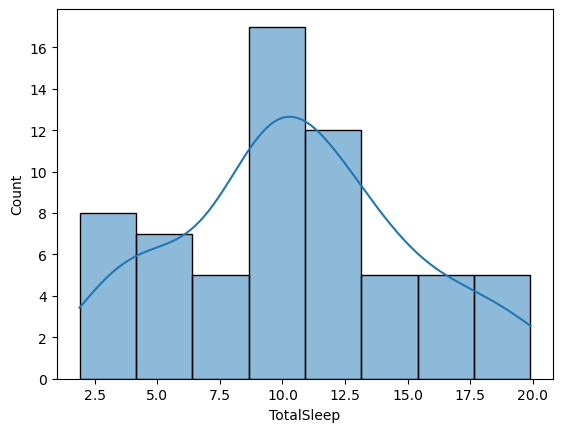

In [41]:
# Histograms for continuous variables
sns.histplot(data['TotalSleep'], kde=True)
plt.show()

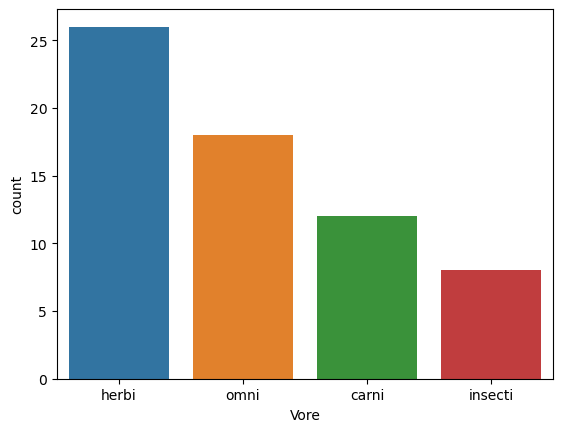

In [42]:
# Box plots / count plots for categorical variables
sns.countplot(x='Vore', data=data)
plt.show()

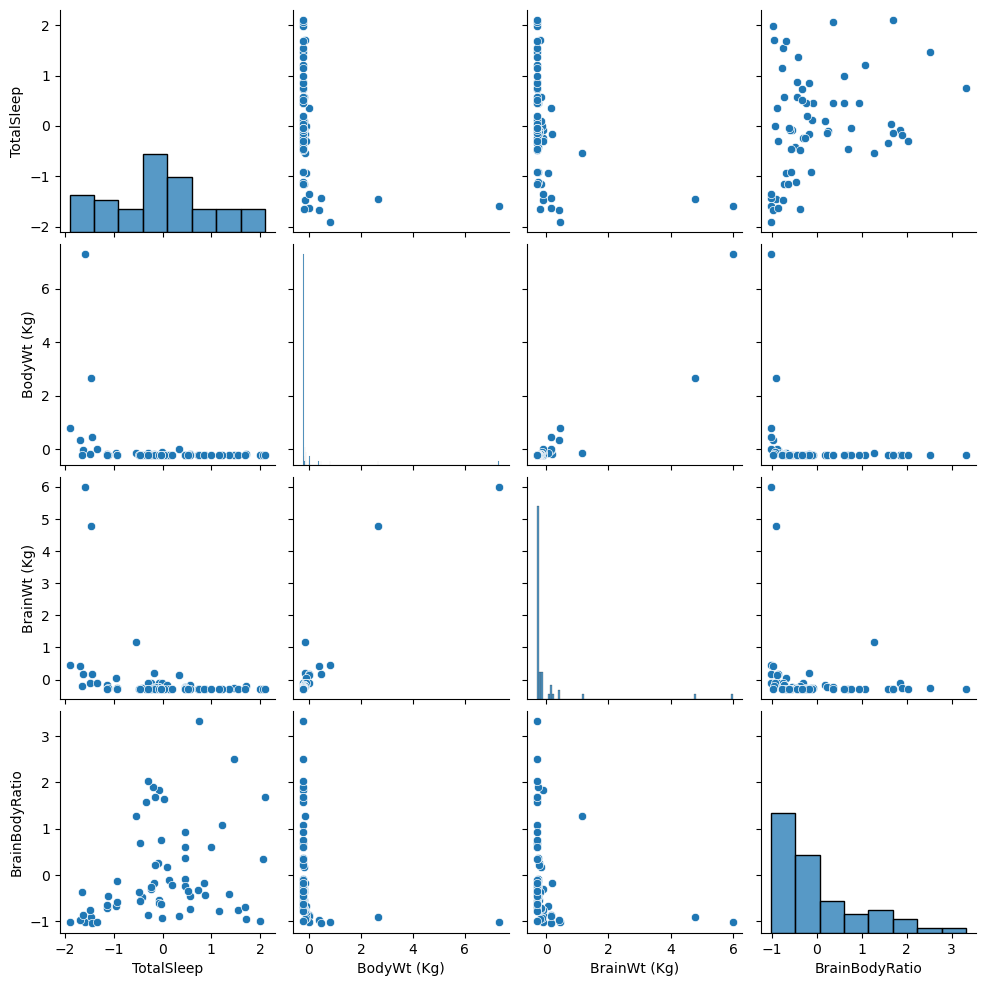

In [43]:
from sklearn.preprocessing import StandardScaler

# Selecting the relevant columns
columns_to_normalize = ['TotalSleep', 'BodyWt (Kg)', 'BrainWt (Kg)', 'BrainBodyRatio']
data_to_normalize = data[columns_to_normalize]

# Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_to_normalize)
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Using pairplot on the normalized data
sns.pairplot(normalized_df)
plt.show()

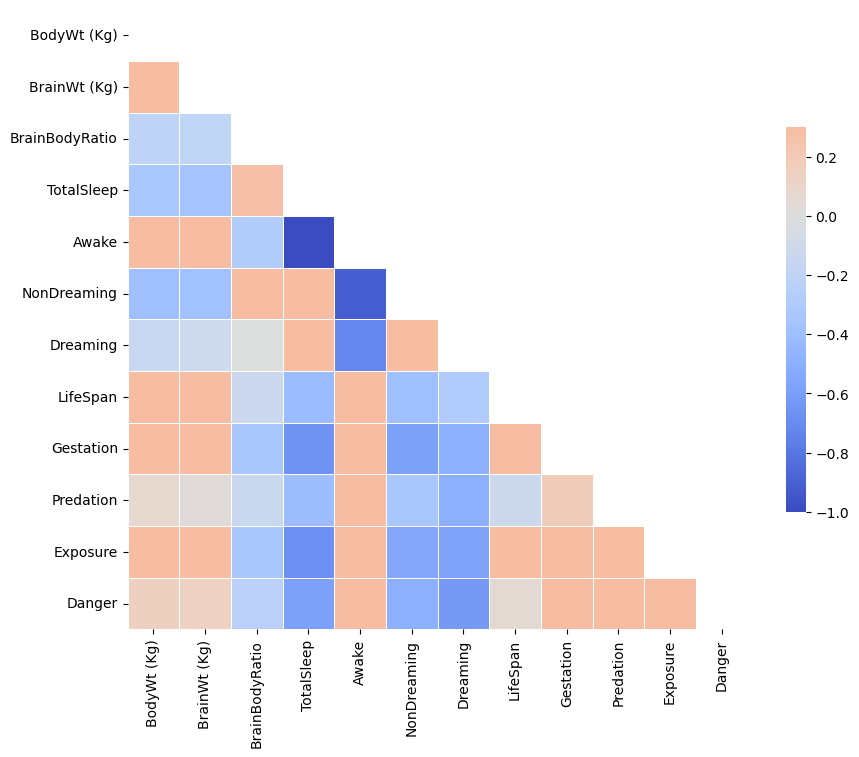

In [44]:
# Filtering only numerical columns for correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Setting up the matplotlib figure
plt.figure(figsize=(10, 10))

# Generating a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(numerical_data.corr(), dtype=bool))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(numerical_data.corr(), annot=True, mask=mask, cmap='coolwarm', 
            vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Displaying the plot
plt.show()

In [45]:
# Log transform data
data['LogBodyWt'] = np.log(data['BodyWt (Kg)'] + 1)
data['LogBrainWt'] = np.log(data['BrainWt (Kg)'] + 1)

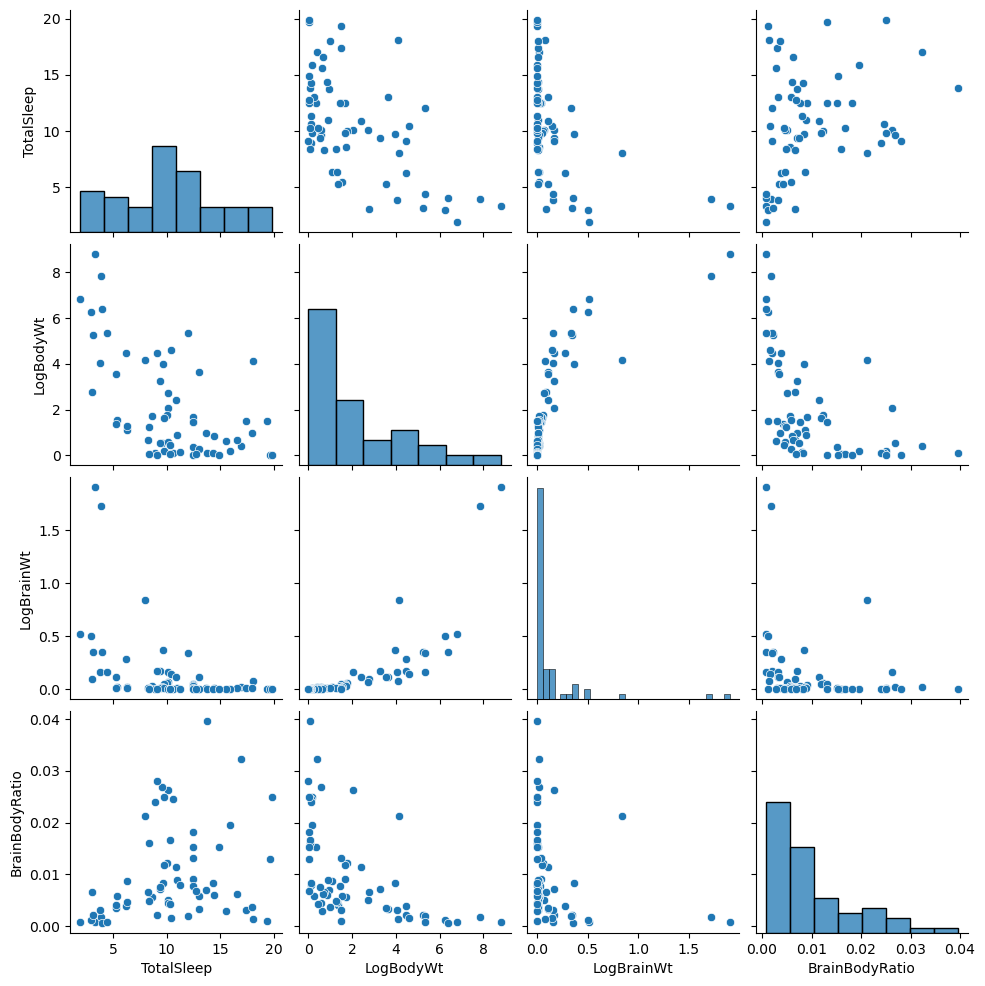

In [46]:
# Pairplot to visualise relationships after log transformation
sns.pairplot(data[['TotalSleep', 'LogBodyWt', 'LogBrainWt', 'BrainBodyRatio']])
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# 'TotalSleep' as target and other columns are features
X = data[['LogBodyWt', 'LogBrainWt', 'BrainBodyRatio']]  # Include other relevant features
y = data['TotalSleep']

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Initialize the model
model = LinearRegression()

In [51]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predict on the test data
y_pred = model.predict(X_test)

In [53]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [54]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 4.113025401231227
R^2 Score: 0.5915157594301579


In [55]:
min_sleep = data['TotalSleep'].min()
max_sleep = data['TotalSleep'].max()

print(f"Minimum Total Sleep: {min_sleep} hours")
print(f"Maximum Total Sleep: {max_sleep} hours")

Minimum Total Sleep: 1.9 hours
Maximum Total Sleep: 19.9 hours


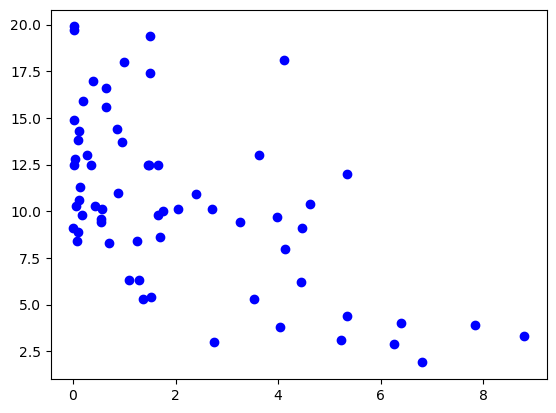

In [56]:
# 'data' is the DataFrame and 'model' is the trained LinearRegression model

# Scatter plot of the actual data
plt.scatter(data['LogBodyWt'], data['TotalSleep'], color='blue', label='Actual Data')

In [57]:
# Calculate the mean values for the other features
mean_brainbody_ratio = data['BrainBodyRatio'].mean()
mean_logbrainwt = data['LogBrainWt'].mean()

In [58]:
# Creating a DataFrame for predictions, ensuring the column order matches the training data
log_bodywt_range = np.linspace(data['LogBodyWt'].min(), data['LogBodyWt'].max(), 100)
prediction_df = pd.DataFrame({
    'LogBodyWt': log_bodywt_range,
    'LogBrainWt': [mean_logbrainwt] * len(log_bodywt_range),  # mean_logbrainwt defined earlier
    'BrainBodyRatio': [mean_brainbody_ratio] * len(log_bodywt_range)  # mean_brainbody_ratio defined earlier
})

In [59]:
# Predict 'TotalSleep' using the model for each value in the range
predicted_sleep = model.predict(prediction_df)

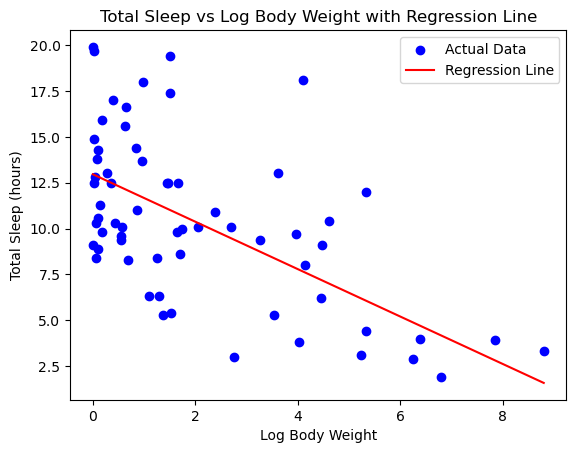

In [60]:
# Create the scatter plot
plt.scatter(data['LogBodyWt'], data['TotalSleep'], color='blue', label='Actual Data')

# Create the regression line plot
plt.plot(log_bodywt_range, predicted_sleep, color='red', label='Regression Line')

# Adding labels, title, and legend
plt.xlabel('Log Body Weight')
plt.ylabel('Total Sleep (hours)')
plt.title('Total Sleep vs Log Body Weight with Regression Line')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [61]:
from sklearn.preprocessing import PolynomialFeatures

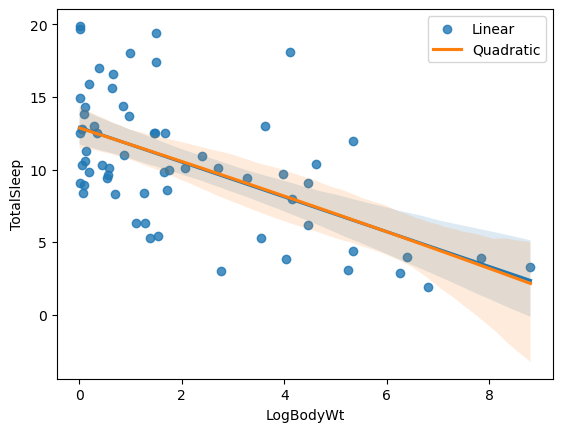

In [62]:
# Confirm that a linear relationship applies 
# Scatter plot with polynomial regression lines
sns.regplot(x='LogBodyWt', y='TotalSleep', data=data, order=1, label='Linear')
sns.regplot(x='LogBodyWt', y='TotalSleep', data=data, order=2, label='Quadratic', scatter=False)
plt.legend()
plt.show()

In [63]:
# Further test regression model using residuals analysis
residuals = y_test - y_pred

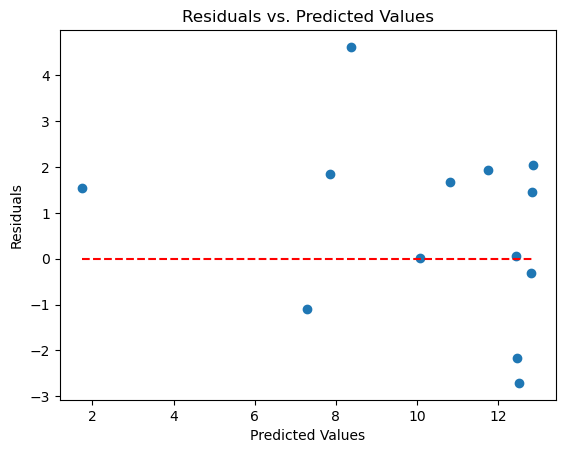

In [64]:
# Residuals vs. Predicted Values
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

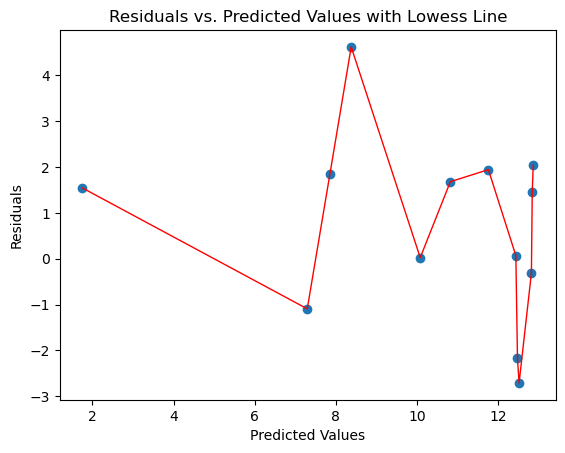

In [65]:
# Residuals vs. Predicted Values with Lowess Line
from statsmodels.nonparametric.smoothers_lowess import lowess

# Calculate lowess line
fraction = 0.3  # Fraction of data to use for smoothing
lowess_line = lowess(residuals, y_pred, frac=fraction)

# Plot
plt.scatter(y_pred, residuals)
plt.plot(lowess_line[:, 0], lowess_line[:, 1], color='red', lw=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values with Lowess Line')
plt.show()

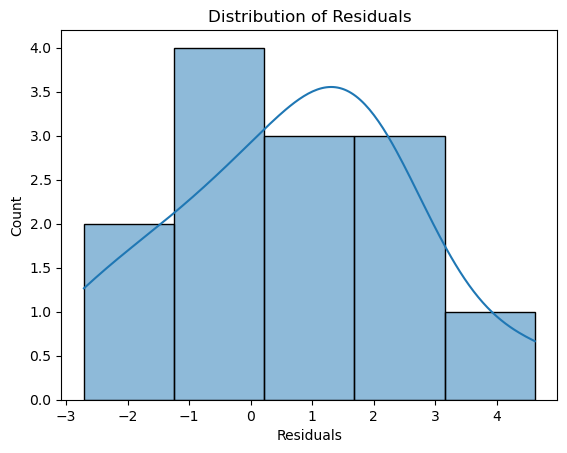

In [66]:
# Histogram of Residuals
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

In [68]:
# Residuals analysis suggest a non-linear relationship does not exist
# Outlier data from order Cingulata, e.g. armidillos, they sleep longer than expected for size
# Armidillo sleep is noted in literature, not able find disseranable reason